In [401]:
from google.colab import files
uploaded = files.upload()

Saving Datasets_final.zip to Datasets_final (5).zip


In [402]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("Datasets_final.zip", 'r') as zip_ref:
    zip_ref.extractall("Datasets_final")

# List extracted files
os.listdir("Datasets_final")

['validate_dataset_final.csv', 'train_dataset_final1.csv']

In [403]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, fbeta_score,classification_report, confusion_matrix

# Replace 'your_file.csv' with the actual file name inside the zip
train = pd.read_csv("Datasets_final/train_dataset_final1.csv")
test = pd.read_csv("Datasets_final/validate_dataset_final.csv")
test_ids=test['Customer_ID']
test.drop("Customer_ID", axis=1, inplace=True)

In [404]:
train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [405]:
train.shape

(25247, 27)

In [406]:
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(test.median(numeric_only=True), inplace=True)

In [407]:
train.head()
test.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,2,220000,32,0,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,0,1,350000,35,-1,-1,-1,0,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,2,1,1,310000,39,0,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,1,0,2,20000,47,0,0,0,2,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,2,1,2,500000,30,0,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [408]:
# Convert Customer_ID to string
train['Customer_ID'] = train['Customer_ID'].astype(str)


In [409]:
print("Marriage:", train['marriage'].unique())  # Should be [1, 2, 3]
print("Sex:", train['sex'].unique())           # Should be [0, 1]
print("Education:", train['education'].unique())  # Should be [1, 2, 3, 4]

# Fix unexpected values (e.g., 0 or 5)
train['education'] = train['education'].replace({0: 4, 5: 4, 6: 4})
train['marriage'] = train['marriage'].replace({0: 3})
test['education'] = test['education'].replace({0: 4, 5: 4, 6: 4})
test['marriage'] = test['marriage'].replace({0: 3})


Marriage: [2 1 3 0]
Sex: [0 1]
Education: [2 1 3 4 5 6 0]


In [410]:
duplicates = train.duplicated().sum()
print(f'Duplicates found: {duplicates}')

train = train.drop_duplicates()
test = test.drop_duplicates()
duplicates_test = train.duplicated().sum()
print(f'Duplicates test found: {duplicates_test}')


Duplicates found: 0
Duplicates test found: 0


In [411]:
pay_cols = [col for col in train.columns if col.startswith('pay_')]
for col in pay_cols:
    print(f"{col}: {sorted(train[col].unique())}")
pay_cols = [col for col in test.columns if col.startswith('pay_')]
for col in pay_cols:
    print(f"{col}: {sorted(test[col].unique())}")

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-412-3453220510>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='next_month_default', data=df, palette='pastel')


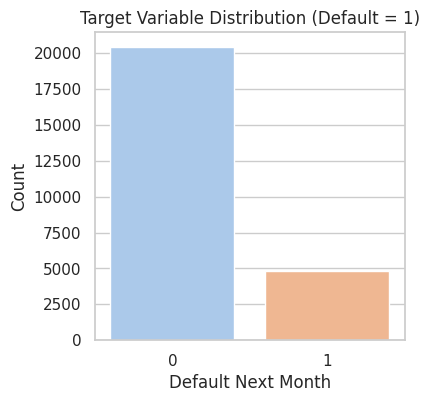

In [412]:

import seaborn as sns
import matplotlib.pyplot as plt


# Set style
sns.set(style="whitegrid")

# Load your dataset
df =train # Replace with your actual file

# ========== Target Distribution ==========
plt.figure(figsize=(4, 4))
sns.countplot(x='next_month_default', data=df, palette='pastel')
plt.title("Target Variable Distribution (Default = 1)")
plt.xlabel("Default Next Month")
plt.ylabel("Count")
plt.show()



Imbalanced Dataset

The number of non-defaulters (label 0) is significantly higher than defaulters (label 1).

Ratio appears to be around 4:1, which qualifies as a moderate class imbalance.

Implications for Modeling

Models might favor the majority class, leading to high accuracy but poor performance on identifying defaulters (which are often more important).

You should monitor metrics like recall, F1-score, and AUC rather than just accuracy.

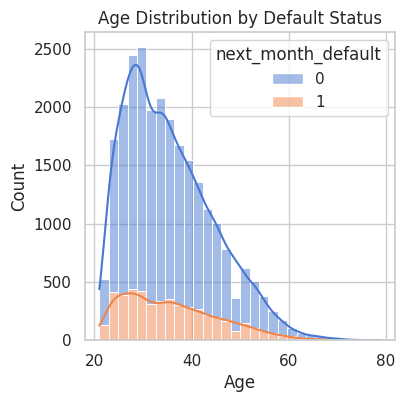

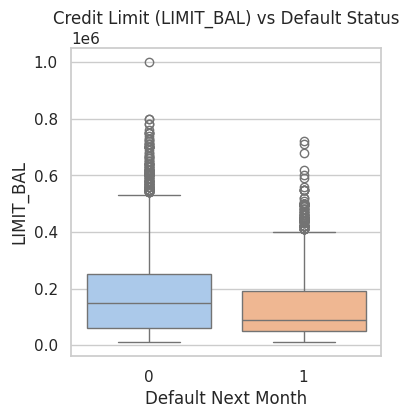

In [413]:
# ========== Age vs Default Rate ==========
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x="age", hue="next_month_default", bins=30, kde=True, palette="muted", multiple="stack")
plt.title("Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ========== LIMIT_BAL vs Default ==========
plt.figure(figsize=(4, 4))
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=df, hue='next_month_default', palette="pastel", legend=False)
plt.title("Credit Limit (LIMIT_BAL) vs Default Status")
plt.xlabel("Default Next Month")
plt.ylabel("LIMIT_BAL")
plt.show()


Most users are aged between 20–40 years.

Among younger age groups (20s to early 30s), defaults (next_month_default=1) are relatively more frequent.

Older individuals (above ~40) tend to default less.

-Younger age groups may represent higher-risk segments. Consider using age as a predictive feature.

he median credit limit is slightly higher for non-defaulters.

There are many outliers in both groups (users with very high credit limits).

Defaulters tend to have slightly lower credit limits.

-People with lower credit limits are more likely to default. This variable likely has predictive power.



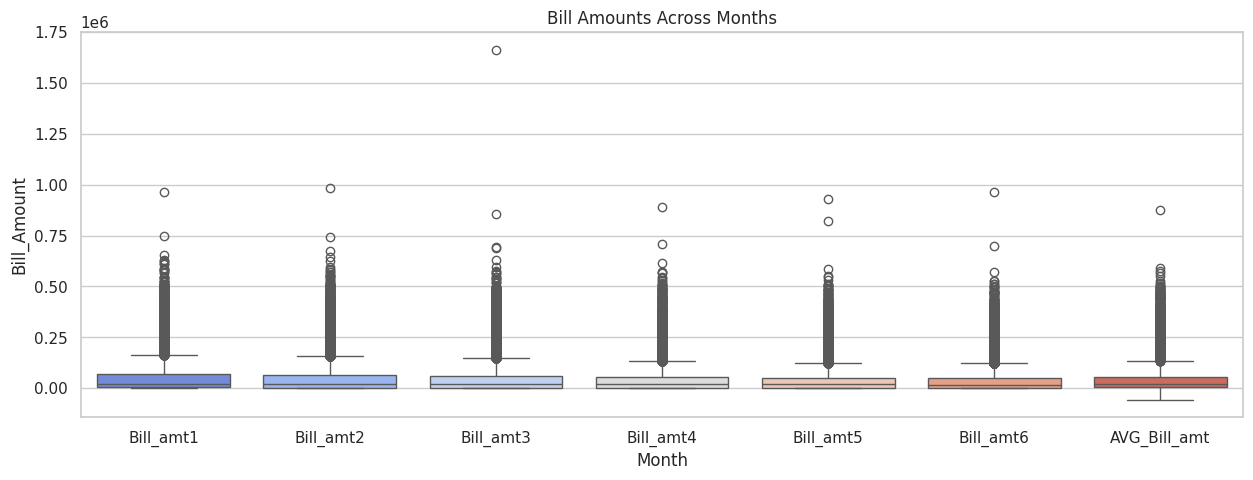

In [414]:
# Define bill_cols from your DataFrame
bill_cols = [col for col in df.columns if 'bill_amt' in col.lower()]

# Melt the bill data into long format
bill_data = df[bill_cols].copy()
bill_data['Customer_ID'] = df['Customer_ID']
bill_data = bill_data.melt(id_vars='Customer_ID', var_name='Month', value_name='Bill_Amount')

# Plot the boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Month', y='Bill_Amount', data=bill_data, hue='Month', palette="coolwarm", dodge=False)
plt.title("Bill Amounts Across Months")
plt.legend([],[], frameon=False)  # Removes the legend
plt.show()


Consistency in Monthly Bills:

The distribution of bill amounts is fairly consistent across months.

The medians (thick lines in boxes) and IQRs (boxes themselves) are similar for all months, indicating users generally maintain similar spending patterns month to month.

Presence of Outliers:

All months have significant high outliers, suggesting that a small group of users has very high bill amounts.

The presence of many outliers emphasizes skewed data distribution (positive/right-skewed).

Central Tendency:

The median bill amount lies between 50,000 and 100,000 for all months.

This reflects the typical monthly credit card usage for most users.

Comparing AVG_Bill_amt:

The AVG_Bill_amt boxplot aligns closely with individual months, confirming that monthly variations are not drastic.

This helps validate that averaging the bills doesn’t introduce bias from outliers too much.


## Interpretations:


Most users spend within a consistent range, but financial institutions should be cautious of high outlier users who may pose a higher credit risk.

This plot can be useful in customer segmentation — identifying heavy spenders vs. low spenders.

The data may benefit from log transformation for modeling due to the high skew.

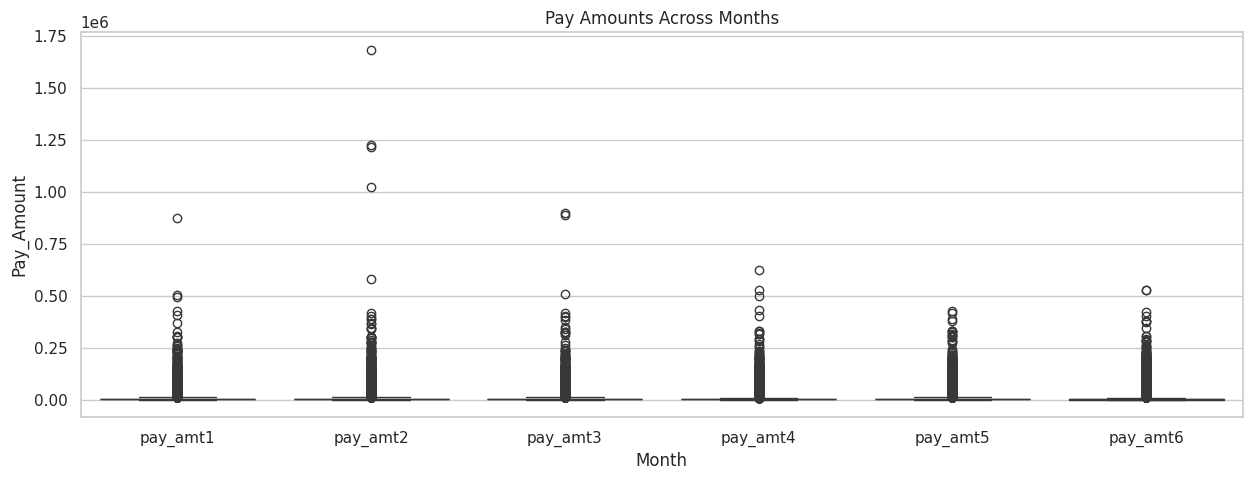

In [415]:
# Step 1: Define payment columns (based on your dataset)
pay_cols = [col for col in df.columns if 'pay_amt' in col.lower()]

# Step 2: Melt pay columns into long format
pay_data = df[pay_cols].copy()
pay_data['Customer_ID'] = df['Customer_ID']
pay_data = pay_data.melt(id_vars='Customer_ID', var_name='Month', value_name='Pay_Amount')

# Step 3: Plot
plt.figure(figsize=(15, 5))  # (4, 0) is too small; increases height
sns.boxplot(x='Month', y='Pay_Amount', data=pay_data, hue='Month', palette="YlGnBu", dodge=False)
plt.title("Pay Amounts Across Months")
plt.legend([],[], frameon=False)  # Removes the legend
plt.show()

High Number of Outliers:
Each month has extreme high outliers, with some users paying over 1 million units.
This indicates that a small fraction of users pay off very large amounts, likely due to high balances or business-related usage.
Very Low Medians:
The median pay amount is very close to zero for all months.
This suggests that more than 50% of users pay either nothing or very low amounts each month, which may be indicative of:
-Minimum payments only
-Delinquency or deferral
-Low credit utilization

# Low Variability in Central Data:

The boxes (IQRs) are extremely narrow, meaning the majority of payment amounts fall within a small range (near zero).

Compared to the Bill_amt boxplots, these payments are significantly smaller and less varied for most users.

Consistent Payment Pattern:=
There is no major trend across months — pay_amt1 to pay_amt6 show similar shapes and ranges.

This implies stable payment behavior (either low or consistent amounts) for most users.

## Interpretations:
1>Most users are either:
    Making very small payments, possibly below the due bill amounts.
    Or not paying at all, which could correlate with default risk.

2>The extreme outliers may be a result of:
    Business credit cards

3>Wealthy individuals

    Exceptional one-time payments

4>This skewed distribution (many small values, few huge ones) is a good candidate for:
    Log transformation for modeling.
    Or binning/categorization to improve ML performance.

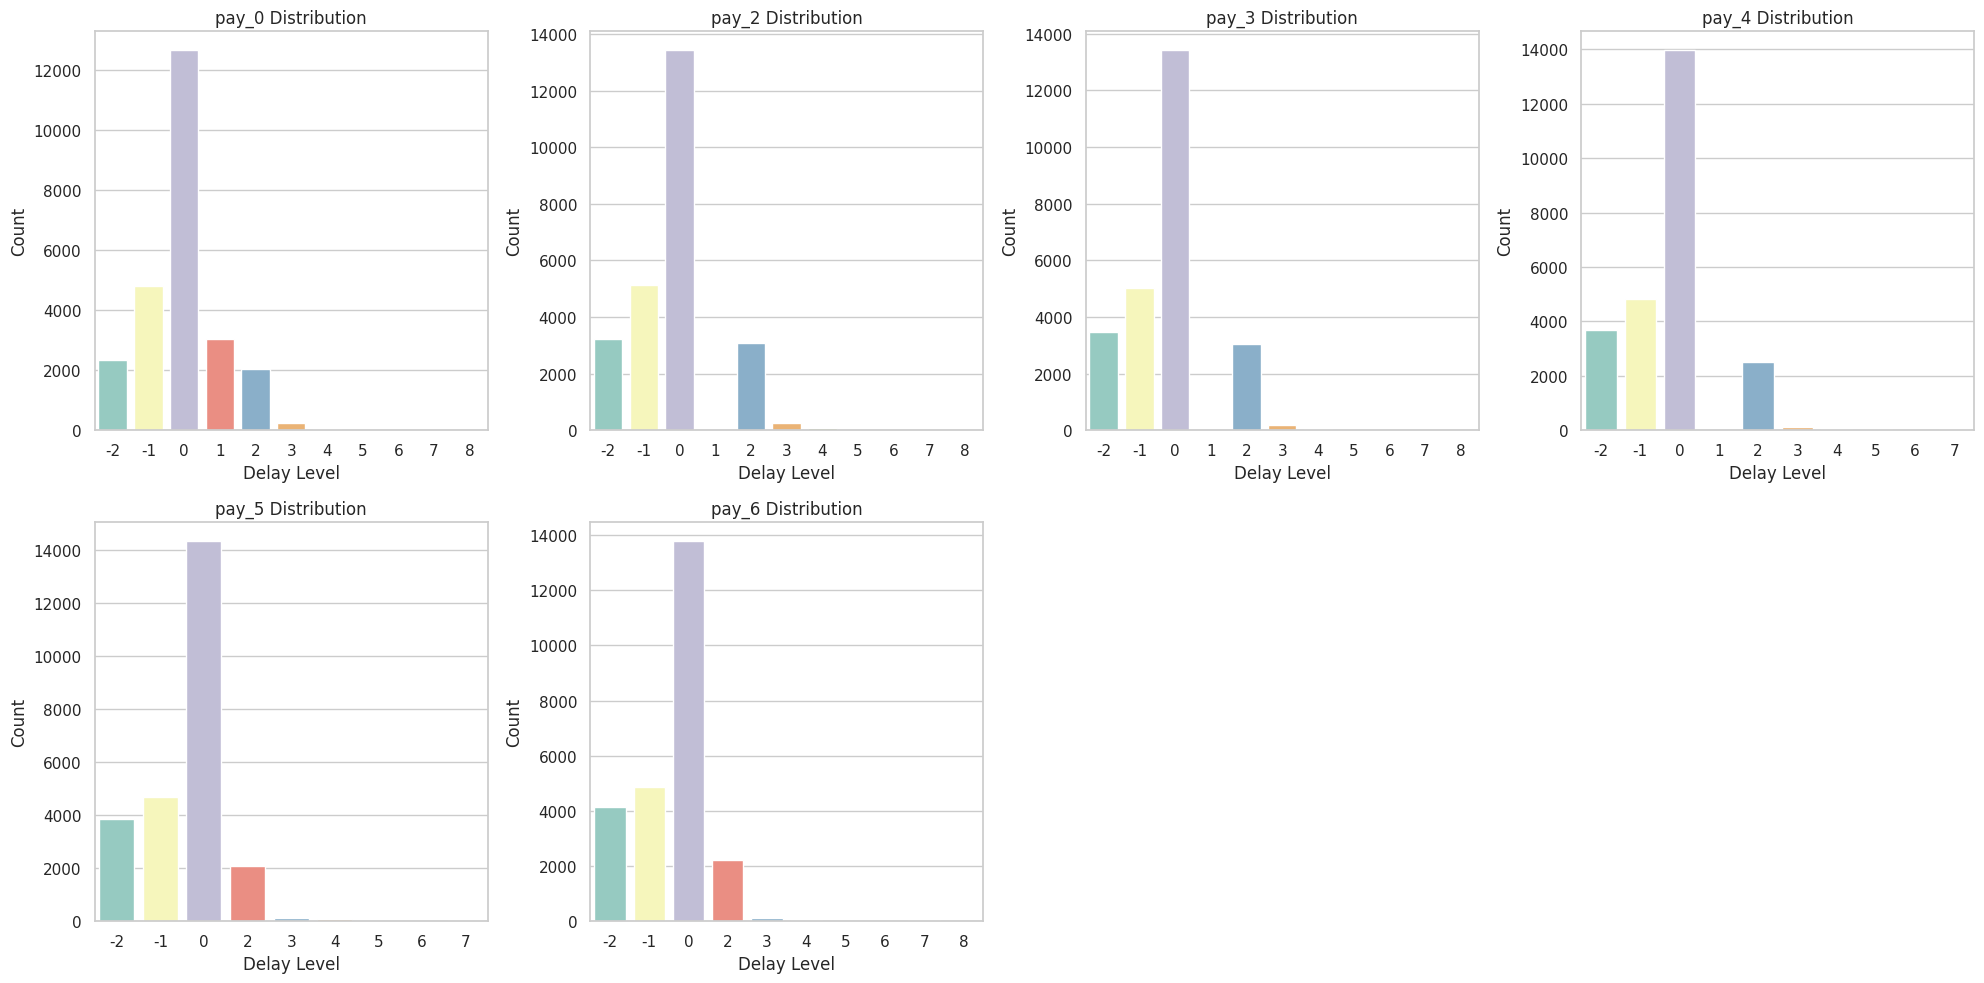

In [416]:
# Select only 'pay_0' to 'pay_6' columns (7 in total)
pay_delay_cols = [col for col in df.columns if col.startswith("pay_") and col not in pay_cols][:7]

# Create 2x4 subplots but only fill first 7
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(pay_delay_cols):
    sns.countplot(x=col, hue=col, data=df, ax=axes[i//4, i%4], palette="Set3", legend=False)
    axes[i//4, i%4].set_title(f"{col} Distribution")
    axes[i//4, i%4].set_xlabel("Delay Level")
    axes[i//4, i%4].set_ylabel("Count")

# Remove last empty subplot (axes[1,2] and axes[1,3])
for j in range(len(pay_delay_cols), 8):
    fig.delaxes(axes[j//4, j%4])

plt.tight_layout()
plt.show()


#Each subplot represents the distribution of delay levels in monthly payments.

Values:

    -2, -1: Early payments or no due

    0: Payment made on time

    1 to 8: Months of delay

Count shows how many users fall into each delay category per month.

Majority Paid On Time (0):
In all months (pay_0 to pay_6), delay level 0 has the highest count, indicating most users paid on time.

Frequent Early Payments (-1 and -2):
Significant number of users have values -1 or -2, likely indicating early payments, no balance, or technical encoding.

Consistent Pattern Across Months:
Delay distributions look stable across months, with similar patterns in each pay_X column.

Moderate Delays Exist:
Delay levels like 1, 2, and 3 are visible but with far lower counts.

Very few users have severe delays (>3).

PAY_5 and PAY_6:
Later months (5 and 6) show fewer users with delays, possibly due to users becoming more consistent or due to data window constraints.

#Interpretation:
#Most users are regular in payments with on-time or early payments dominating.

##A small subset of users experiences 1–3 month delays, which may signal potential risk of default.

##This categorical distribution is highly imbalanced, which should be handled carefully in modeling (e.g., combining delay levels or using class weights).

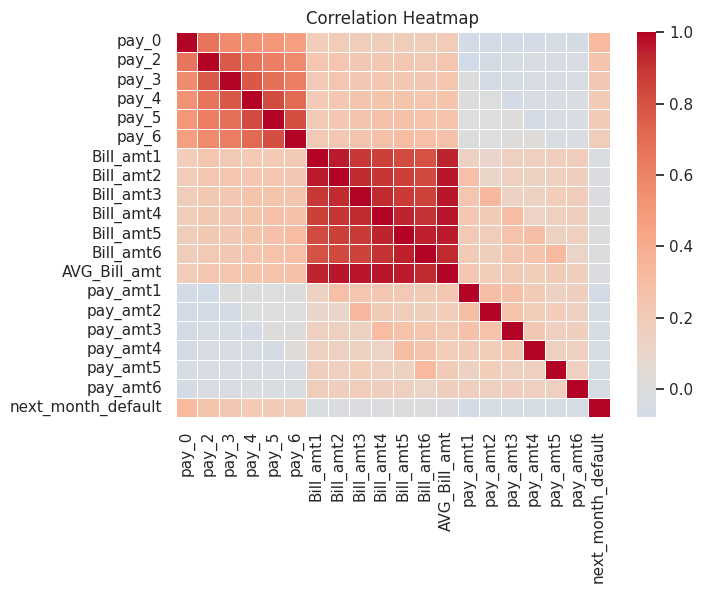

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  object 
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25247 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [417]:
# ========== Correlation Heatmap ==========
selected_cols = pay_delay_cols + bill_cols + pay_cols + ['next_month_default']
corr = df[selected_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ========== Financial Insights ==========J
# 1. Average delay across months
df["avg_delay"] = df[pay_delay_cols].mean(axis=1)
test["avg_delay"] = test[pay_delay_cols].mean(axis=1)
print(train.info(),test.info())


#🟥 Strong Positive Correlations:
1>Among Bill Amount Columns (Bill_amt1 to Bill_amt6):

    Extremely high correlation (deep red) indicating that:

    Users who have a high bill in one month tend to have high bills in other months too.

    Customer spending patterns are consistent over time.

2>Among Pay Delay Columns (pay_0 to pay_6):

    Moderate to strong correlation, meaning:

    If a user delayed payment in one month, they are likely to delay again.

    This shows a tendency for repeated delinquencies.



#🟦 Low to Moderate Correlation with next_month_default:
1>Payment Delays (pay_0 to pay_6):

    Weak to moderate positive correlation with next_month_default.

Interpretation:

  More frequent or severe delays increase the chance of default.

  Among these, pay_0 (most recent delay) may show slightly higher correlation than earlier ones.

2> Bill Amounts (Bill_amtX):

    Very low correlation with default.

    Just having a high bill doesn't directly lead to default.

    The behavior in payments (not amount) seems more critical.

3>Payment Amounts (pay_amtX):

    Slight negative correlation with next_month_default.

Interpretation:

Higher payments may slightly reduce the chance of default.

But this effect is not very strong.

4 > Average Delay (AVG_Bill_amt, Avg_delay):

If you've added an Avg_delay column (as per code), it likely shows:

Moderate positive correlation with default.

Indicates that people with consistently higher delays across months are at more risk.

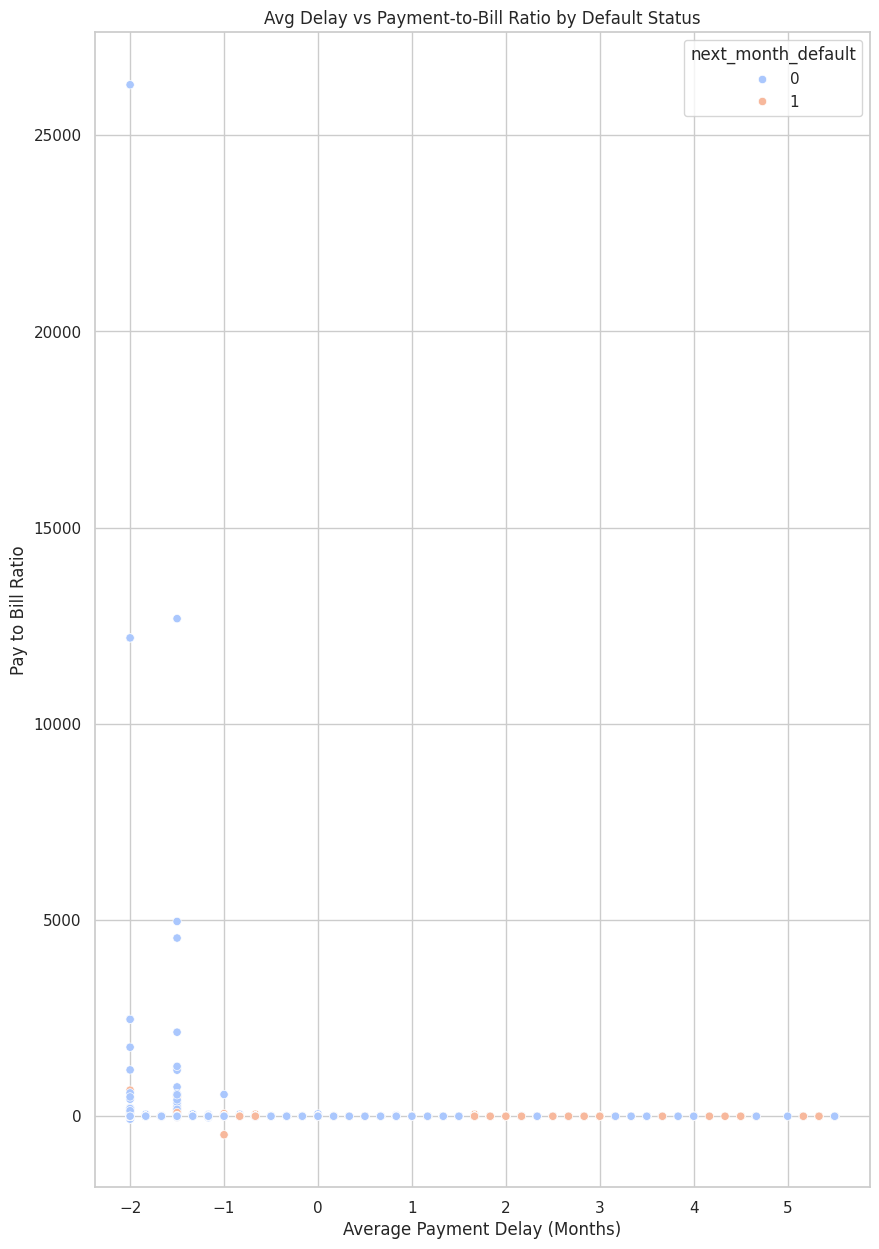

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  object 
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25247 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [418]:
# 2. Average payment-to-bill ratio across months
df["AVG_Payment"] = df[pay_cols].mean(axis=1)
df["AVG_Bill"] = df[bill_cols].mean(axis=1)
df["pay_to_bill_ratio"] = df["AVG_Payment"] / (df["AVG_Bill"] + 1)  # +1 to avoid division by zero


test["AVG_Payment"] = test[pay_cols].mean(axis=1)
test["AVG_Bill"] = test[bill_cols].mean(axis=1)
test["pay_to_bill_ratio"] = test["AVG_Payment"] / (test["AVG_Bill"] + 1)

plt.figure(figsize=(10, 15))
sns.scatterplot(data=df, x="avg_delay", y="pay_to_bill_ratio", hue="next_month_default", palette="coolwarm")
plt.title("Avg Delay vs Payment-to-Bill Ratio by Default Status")
plt.xlabel("Average Payment Delay (Months)")
plt.ylabel("Pay to Bill Ratio")
plt.show()
df["avg_delay"] = df[pay_delay_cols].mean(axis=1)
test["avg_delay"] = test[pay_delay_cols].mean(axis=1)



The scatter plot titled "Avg Delay vs Payment-to-Bill Ratio by Default Status" provides valuable insights into customer repayment behavior. On the X-axis, it displays the average payment delay in months (calculated from pay_0 to pay_6), and on the Y-axis, it shows the average payment-to-bill ratio across all months, computed as the average of payment amounts divided by the average of bill amounts (plus 1 to prevent division by zero). The data points are color-coded by the next_month_default status, which indicates whether the customer defaulted in the following month.

From the plot, we observe that high payment-to-bill ratios (even reaching values above 20,000) are rare and typically associated with non-defaulters. These extreme values suggest overpayments made on very small bills and represent financial overcommitment or system anomalies. On the contrary, there is a distinct cluster of customers with low pay-to-bill ratios and high average delays (greater than 2 months) who are more frequently labeled as defaulters. This indicates a strong correlation between underpayment, late payments, and increased risk of default.

Most customers are concentrated in the safe zone, where the average delay is between 0 and 1 month, and the pay-to-bill ratio is close to 1. These customers typically pay their bills in full and on time and are rarely marked as defaulters. Another notable segment includes customers with negative delays, meaning they pay in advance. These customers often have high payment-to-bill ratios and show an exceptionally low risk of default, indicating highly disciplined financial behavior.

Overall, the plot illustrates that customers who delay payments by more than 2 months and pay less than what they are billed are highly likely to default. In contrast, timely and full payments significantly reduce the probability of default. These findings suggest that average delay and pay-to-bill ratio are strong predictors of default risk and should be considered as key features in any predictive modeling task.



## feature scaling

In [419]:

import numpy as np
def preprocess(df):
    """
    Preprocess the dataset and engineer features for credit default prediction.

    Args:
        df (pd.DataFrame): Input dataframe with raw features.

    Returns:
        pd.DataFrame: Processed dataframe with engineered features.
    """
    df = df.copy()

    # Validate required columns
    required_cols = ['LIMIT_BAL', 'sex', 'marriage', 'education'] + \
                   [f'Bill_amt{i}' for i in range(1, 7)] + \
                   [f'pay_amt{i}' for i in range(1, 7)] + \
                   ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")

    # Convert categorical variables to category type
    for col in ['sex', 'marriage', 'education']:
        df[col] = df[col].astype('category')

    # Define column groups
    bill_cols = [f"Bill_amt{i}" for i in range(1, 7)]
    pay_cols = [f"pay_amt{i}" for i in range(1, 7)]  # Payment amounts
    pay_status = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']  # Payment delay statuses

    # Compute average bill and payment amounts
    df['avg_bill'] = df[bill_cols].mean(axis=1)
    df['avg_pay'] = df[pay_cols].mean(axis=1)

    # Calculate ratios with small constant to avoid division by zero
    df['pay_to_bill_ratio'] = df['avg_pay'] / (df['avg_bill'].abs() + 1e-5)
    df['utilization'] = df['avg_bill'] / (df['LIMIT_BAL'] + 1e-5)

    # Payment delay features
    df['avg_delay'] = df[pay_status].mean(axis=1)
    df['delinq_count'] = (df[pay_status] >= 1).sum(axis=1)
    df['num_delinquent'] = df['delinq_count']  # Kept for compatibility, but redundant
    df['max_delinquency'] = df[pay_status].max(axis=1)

    # Repayment consistency (standard deviation of payments)
    df['repayment_consistency'] = df[pay_cols].std(axis=1).fillna(0)

    # Log-transform LIMIT_BAL to handle skewness
    df['log_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=0))

    # New feature: Bill amount trend (slope over months)
    def compute_trend(row):
         months = np.arange(1, 7)
         bill_values = row[bill_cols].values.astype(np.float64)  # ensure float
         if np.all(bill_values == 0) or np.isnan(bill_values).all():
             return 0
         try:
             return np.polyfit(months, bill_values, 1)[0]
         except Exception:
             return 0





    df['bill_trend'] = df.apply(compute_trend, axis=1)

    # New feature: Stability of payment-to-bill ratio over months
    pay_ratios = df[pay_cols].div(df[bill_cols].abs() + 1e-5, axis=0)
    df['pay_ratio_stability'] = pay_ratios.std(axis=1).fillna(0)

    return df



# Average payment amount over 6 months
pay_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
train['avg_pay_amt'] = train[pay_cols].mean(axis=1)
test['avg_pay_amt'] = test[pay_cols].mean(axis=1)



# Delinquency streak: max consecutive months where pay_m >= 1
def max_consecutive_delinquency(row):
    vals = (row >= 1).astype(int).values
    max_streak = current_streak = 0
    for v in vals:
        if v == 1:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

train['delinquency_streak'] = train[pay_status_cols].apply(max_consecutive_delinquency, axis=1)
train=preprocess(train)
test['delinquency_streak'] = test[pay_status_cols].apply(max_consecutive_delinquency, axis=1)
test=preprocess(test)


In [420]:
 train['next_month_default'].value_counts()
 import pandas as pd

# Assuming your dataset is named new_dataset
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:  # ✅ check if column exists
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        else:
            print(f"⚠️ Column not found: {col}")
    return df


# Columns to check for outliers
columns_to_check = ['LIMIT_BAL', 'age', 'AVG_Payment', 'AVG_Bill',
                    'credit_utilization_ratio', 'avg_pay_amt', 'pay_to_bill_ratio']

filtered_dataset = remove_outliers_iqr(train, columns_to_check)
filtered_dataset =preprocess(filtered_dataset)
train=filtered_dataset
filtered_dataset_test = remove_outliers_iqr(test, columns_to_check)
filtered_dataset_test =preprocess(filtered_dataset_test)
test=filtered_dataset_test
print("Train Columns:", train.columns.tolist())
print("Test Columns:", test.columns.tolist())


⚠️ Column not found: credit_utilization_ratio
⚠️ Column not found: credit_utilization_ratio
Train Columns: ['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default', 'avg_delay', 'AVG_Payment', 'AVG_Bill', 'pay_to_bill_ratio', 'avg_pay_amt', 'delinquency_streak', 'avg_bill', 'avg_pay', 'utilization', 'delinq_count', 'num_delinquent', 'max_delinquency', 'repayment_consistency', 'log_LIMIT_BAL', 'bill_trend', 'pay_ratio_stability']
Test Columns: ['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO

unbalanced data

0--> normal
1--> fraudulent


In [421]:
#sperating the data for analysis
legit=train[train['next_month_default']==0]
fraud=train[train['next_month_default']==1]

In [422]:
 print(legit.shape)
 print(fraud.shape)

(14574, 43)
(3924, 43)


In [423]:
 legit.AVG_Bill_amt.describe()

,AVG_Bill_amt
count,14574.000000
mean,26790.080696
std,29332.212164
min,-2997.000000
25%,3445.955000
50%,16282.750000
75%,40685.127500
max,119540.500000


In [424]:
 fraud.AVG_Bill_amt.describe()

,AVG_Bill_amt
count,3924.000000
mean,26478.687982
std,28283.439594
min,-2828.000000
25%,3293.210000
50%,17579.585000
75%,39109.040000
max,119499.500000


In [425]:
train.groupby('next_month_default')[train.select_dtypes(include='number').columns].mean()

,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,...,avg_bill,avg_pay,utilization,delinq_count,num_delinquent,max_delinquency,repayment_consistency,log_LIMIT_BAL,bill_trend,pay_ratio_stability
next_month_default,,,,,,,,,,,,,,,,,,,,,
0,142740.634006,34.775765,-0.166529,-0.241046,-0.264375,-0.324070,-0.367161,-0.397008,33282.355670,30569.888406,...,26800.841989,2301.407328,0.337749,0.578702,0.578702,0.271923,1954.814389,11.514134,-2446.903577,0.0
1,107212.028542,35.157492,0.680683,0.520387,0.422528,0.325688,0.225025,0.154689,29913.324819,29006.604587,...,26489.481220,1763.109636,0.433692,2.107288,2.107288,1.332569,1644.626500,11.174399,-1479.910501,0.0


use undersampling data

In [426]:
legit_sample=legit.sample(n=3929)

concatenating two dataframe

In [427]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [428]:
 new_dataset.tail()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,avg_bill,avg_pay,utilization,delinq_count,num_delinquent,max_delinquency,repayment_consistency,log_LIMIT_BAL,bill_trend,pay_ratio_stability
25225,30242,2,1,2,30000,24.0,2,0,0,0,...,18715.853333,533.433333,0.623862,1,1,2,864.070065,10.308986,-6536.497714,0.0
25226,30243,1,1,2,80000,35.0,1,2,2,2,...,32885.158333,1418.923333,0.411064,6,6,2,1377.224323,11.289794,762.514000,0.0
25234,30251,2,1,1,100000,38.0,2,2,2,2,...,40377.793333,1916.580000,0.403778,6,6,2,801.075144,11.512935,958.804571,0.0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,41371.536667,5968.343333,0.689526,0,0,0,7879.765467,11.002117,-11188.678286,0.0
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,3071.603333,4035.801667,0.025597,0,0,-1,3743.889877,11.695255,1434.638857,0.0


In [429]:
new_dataset['next_month_default'].value_counts()

,count
next_month_default,
0,3929
1,3924


In [430]:
 new_dataset.groupby('next_month_default')[train.select_dtypes(include='number').columns].mean()

,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,...,avg_bill,avg_pay,utilization,delinq_count,num_delinquent,max_delinquency,repayment_consistency,log_LIMIT_BAL,bill_trend,pay_ratio_stability
next_month_default,,,,,,,,,,,,,,,,,,,,,
0,143901.756172,34.696106,-0.166709,-0.252991,-0.269280,-0.335454,-0.360143,-0.401120,32890.003001,30194.986386,...,26529.286672,2284.421842,0.330536,0.597608,0.597608,0.279715,1966.819179,11.517638,-2368.464686,0.0
1,107212.028542,35.157492,0.680683,0.520387,0.422528,0.325688,0.225025,0.154689,29913.324819,29006.604587,...,26489.481220,1763.109636,0.433692,2.107288,2.107288,1.332569,1644.626500,11.174399,-1479.910501,0.0


In [431]:
X=new_dataset.drop(columns=['Customer_ID','next_month_default'],axis=1)
Y=new_dataset['next_month_default']
import numpy as np

# Replace inf and -inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
train = pd.concat([X, Y], axis=1)


# Check how many NaNs are in each column
print(X.isnull().sum())
# Fill with mode (most frequent bucket)



# Option 1: Drop rows with NaNs (only if very few)
X.dropna(inplace=True)
test.dropna(inplace=True)



marriage                 0
sex                      0
education                0
LIMIT_BAL                0
age                      0
pay_0                    0
pay_2                    0
pay_3                    0
pay_4                    0
pay_5                    0
pay_6                    0
Bill_amt1                0
Bill_amt2                0
Bill_amt3                0
Bill_amt4                0
Bill_amt5                0
Bill_amt6                0
pay_amt1                 0
pay_amt2                 0
pay_amt3                 0
pay_amt4                 0
pay_amt5                 0
pay_amt6                 0
AVG_Bill_amt             0
PAY_TO_BILL_ratio        0
avg_delay                0
AVG_Payment              0
AVG_Bill                 0
pay_to_bill_ratio        0
avg_pay_amt              0
delinquency_streak       0
avg_bill                 0
avg_pay                  0
utilization              0
delinq_count             0
num_delinquent           0
max_delinquency          0
r

In [432]:
# Identify numeric columns (excluding target)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols_test = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Normalize numeric features using StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X

scaler = StandardScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])
test
(X.dtypes == test.dtypes).all()


np.True_

In [433]:

 Y


,next_month_default
3309,0
21227,0
18655,0
22584,0
2642,0
...,...
25225,1
25226,1
25234,1
25243,1


In [434]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
X_train.shape



(6282, 41)

logistic regression


In [435]:
 model_logisticRegression=LogisticRegression(max_iter=1000, class_weight='balanced')

# model traning


In [436]:
#train logistic regration model with data
model_logisticRegression= make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,class_weight='balanced'))
X_train.shape

(6282, 41)

In [437]:
model_logisticRegression.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

model evalution
accuracy score

In [438]:
# accuracy on training data
from sklearn.metrics import accuracy_score, fbeta_score

# Training accuracy
x_train_prediction = model_logisticRegression.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_prediction)
training_f2_score = fbeta_score(Y_train, x_train_prediction, beta=2)

print('Accuracy on Training Data:', training_data_accuracy)
print('F2 Score on Training Data:', training_f2_score)

# Test accuracy
x_test_prediction = model_logisticRegression.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, x_test_prediction)
test_f2_score = fbeta_score(Y_test, x_test_prediction, beta=2)
test_f1 = f1_score(Y_test, x_test_prediction)
test_recall = recall_score(Y_test, x_test_prediction)

print('Accuracy on Test Data:', test_data_accuracy)
print('F2 Score on Test Data:', test_f2_score)
print(f"test Recall Score: ", test_recall)
print(f"test F1 Score : ",test_f1)



Accuracy on Training Data: 0.695479146768545
F2 Score on Training Data: 0.6340579710144928
Accuracy on Test Data: 0.7122851686823679
F2 Score on Test Data: 0.6489053020311264
test Recall Score:  0.6267515923566879
test F1 Score :  0.6852367688022284


###use Decision Tree


In [439]:
from sklearn.tree import DecisionTreeClassifier

In [440]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

params = {
    'max_depth': [30, 80, 10, 8,10],
    'min_samples_split': [2,7,6, 5, 10],
    'min_samples_leaf': [1, 3, 5,10,10]
}

f2_scorer = make_scorer(fbeta_score, beta=2)

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring=f2_scorer, cv=5)
grid.fit(X_test, Y_test)

best_model = grid.best_estimator_
print("Best F2 Score on CV:", grid.best_score_)

Best F2 Score on CV: 0.6262578640458342


<Figure size 640x480 with 0 Axes>

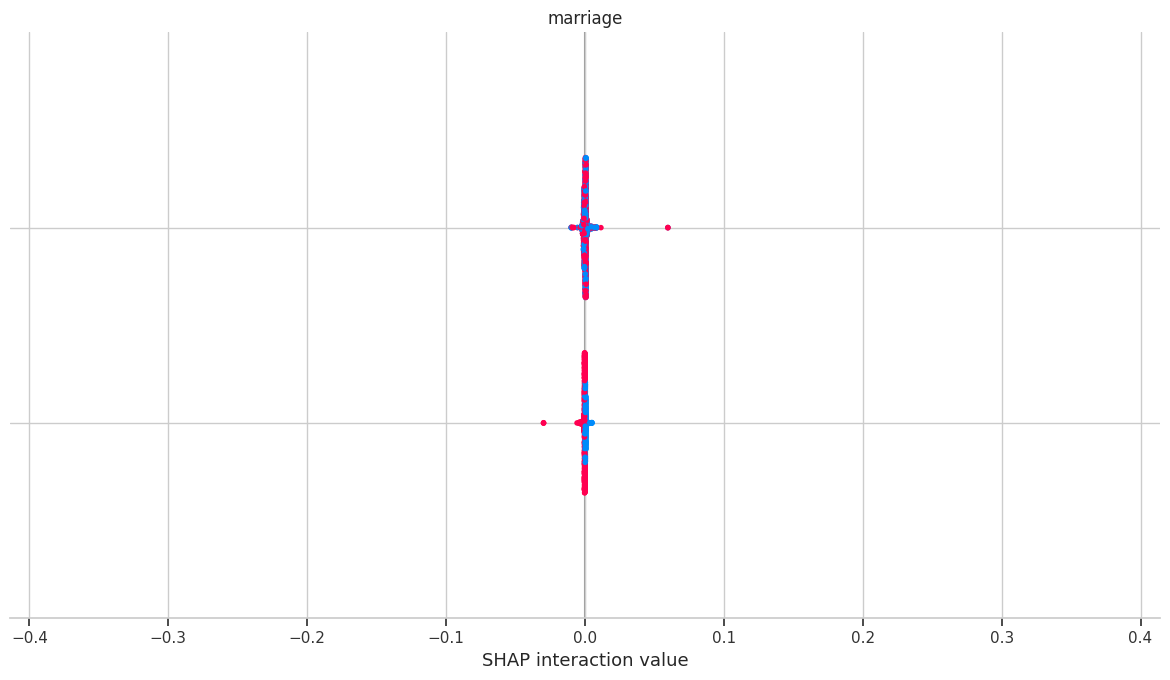

<Figure size 640x480 with 0 Axes>

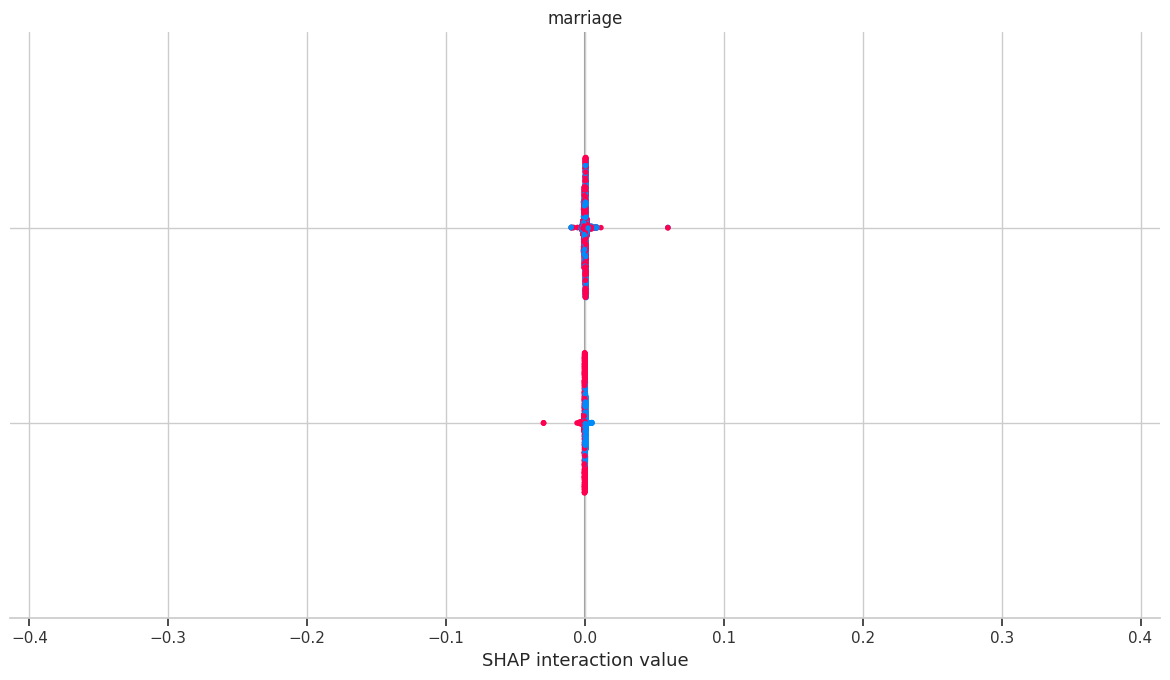

Train Accuracy: 0.8186883158229863
Test Accuracy: 0.6403564608529599
Train F2 Score: 0.813953488372093
Test F2 Score: 0.6434384537131231
test Recall Score:  0.6267515923566879
test F1 Score :  0.6852367688022284


In [441]:
model_decisionTreeclassifier = DecisionTreeClassifier(
    max_depth=70,
    min_samples_split=19,
    min_samples_leaf=10,
    random_state=4
)
model_decisionTreeclassifier.fit(X_train, Y_train)

# 3. Make predictions
y_train_pred = model_decisionTreeclassifier.predict(X_train)
y_test_pred = model_decisionTreeclassifier.predict(X_test)

import shap
import matplotlib.pyplot as plt


# ========================
# SHAP SETUP
# ========================
# For tree-based models (XGBoost, RandomForest, LightGBM, etc.)
explainer = shap.Explainer(model_decisionTreeclassifier)  # If you are using XGBoost or RandomForest
sample_index = 1
sample = X_test.iloc[[sample_index]]
shap_values = explainer(X_test)
shap_values_sample = explainer.shap_values(sample)


# ========================
# SHAP GLOBAL EXPLANATION
# ========================
# Summary plot shows feature importance across all test samples
shap.summary_plot(shap_values, X_test)

# Bar plot: Average impact of each feature
shap.summary_plot(shap_values, X_test, plot_type="bar")

# ========================
# SHAP LOCAL EXPLANATION
# ========================
# Explain a single prediction (e.g., first test sample)
shap.initjs()  # For Jupyter Notebook interactive plots


class_index = 1  # or 0
shap.force_plot(
    base_value=explainer.expected_value[class_index],
    shap_values=shap_values_sample[0][:, class_index],  # select column for that class
    features=sample.iloc[0],
    feature_names=sample.columns
)

# 4. Evaluate Accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

train_f2 = fbeta_score(Y_train, y_train_pred, beta=2)
test_f2 = fbeta_score(Y_test, y_test_pred, beta=2)


test_f1 = f1_score(Y_test, x_test_prediction)
test_recall = recall_score(Y_test, x_test_prediction)

# 6. Print the results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train F2 Score:", train_f2)
print("Test F2 Score:", test_f2)
print(f"test Recall Score: ", test_recall)
print(f"test F1 Score : ",test_f1)



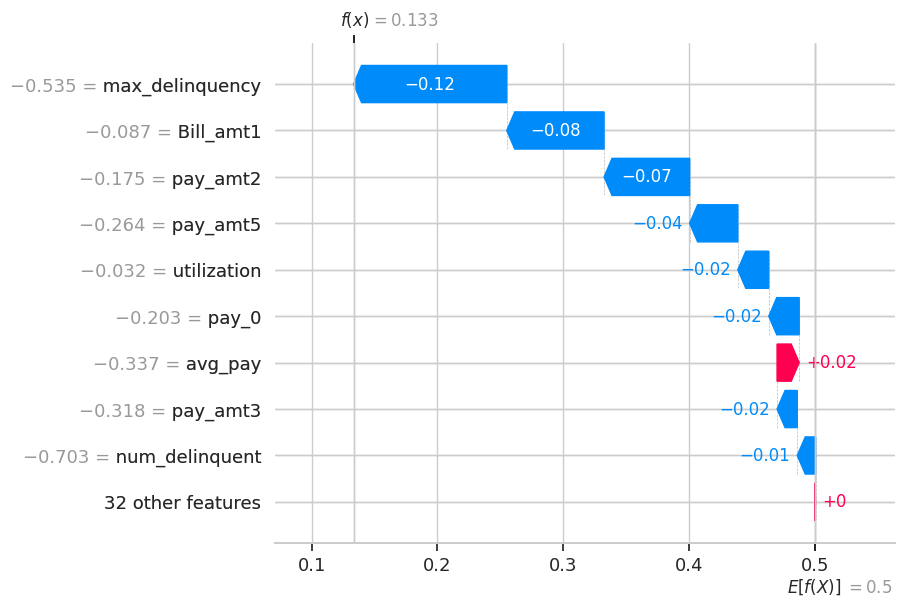

In [442]:
import shap

# Select sample index and class index
sample_index = 0
class_index = 1  # Use 0 or 1 depending on which class you want to explain

# Create Explanation object
explanation = shap.Explanation(
    values=shap_values.values[sample_index, :, class_index],
    base_values=shap_values.base_values[sample_index, class_index],
    data=shap_values.data[sample_index],
    feature_names=X_test.columns
)

# Now plot waterfall
shap.plots.waterfall(explanation)


In [443]:
import shap
import numpy as np
import pandas as pd

# Get SHAP explanation for a sample (same as before)
sample_index = 1
sample = X_test.iloc[[sample_index]]
explanation = explainer(sample)

# Explanation.values shape: (1, num_features, num_classes)
# So we extract class 1 contributions
shap_values_class1 = explanation.values[0][:, 1]  # Class 1
feature_values = explanation.data[0]  # Shape: (num_features,)
feature_names = explanation.feature_names  # List of feature names

# Build DataFrame with class 1 shap values
shap_df = pd.DataFrame({
    "feature": feature_names,
    "feature_value": feature_values,
    "shap_value": shap_values_class1
})

# Sort by absolute SHAP value
shap_df["abs_shap"] = np.abs(shap_df["shap_value"])
shap_df_sorted = shap_df.sort_values(by="abs_shap", ascending=False)

# Display top features
top_n = 10
print(f"Top {top_n} most impactful features for class 1 prediction on sample {sample_index}:\n")
print(shap_df_sorted.head(top_n)[["feature", "feature_value", "shap_value"]])


Top 10 most impactful features for class 1 prediction on sample 1:

              feature  feature_value  shap_value
36    max_delinquency       0.793047    0.248856
38      log_LIMIT_BAL       0.913728    0.084025
5               pay_0      -0.202714   -0.075106
35     num_delinquent       0.337203   -0.068389
19           pay_amt3       1.852348   -0.058521
22           pay_amt6       1.503374    0.041748
32            avg_pay       1.349836   -0.035774
31           avg_bill       1.792711    0.029238
28  pay_to_bill_ratio      -0.627933    0.021933
11          Bill_amt1       1.099414   -0.016227


##lets try xgboast

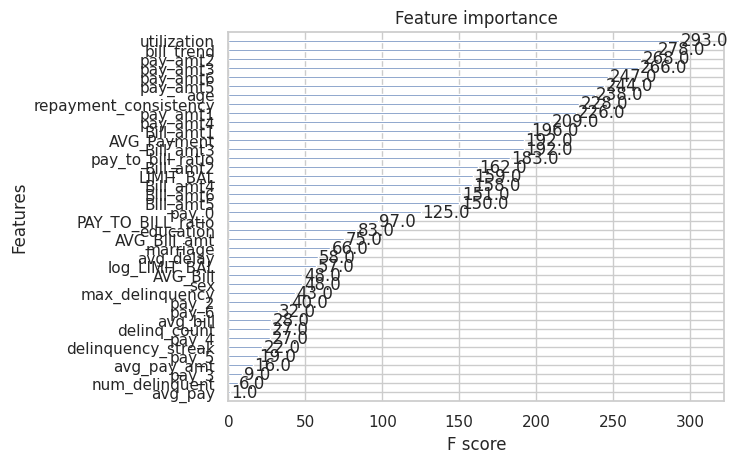

Train Accuracy: 0.8225087551735116
Test Accuracy: 0.7154678548695098
Train F2 Score: 0.7935839274141283
Test F2 Score: 0.6719728601252609
test Recall Score:  0.6267515923566879
test F1 Score :  0.6852367688022284


In [444]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=1,     # important if your dataset is imbalanced
    eval_metric='logloss',
    enable_categorical=True,
    max_depth=4,                # controls tree complexity
    min_child_weight=3,         # avoids overfitting
    subsample=0.8,              # randomness for rows
    colsample_bytree=0.8,       # randomness for features
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    learning_rate=0.05,         # slow down learning
    n_estimators=400,           # increase trees
    random_state=43
)
xgb_model.fit(X_train, Y_train)
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)
train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)
train_f2 = fbeta_score(Y_train, train_pred, beta=2)
test_f2 = fbeta_score(Y_test, test_pred, beta=2)
test_f1 = f1_score(Y_test, x_test_prediction)
test_recall = recall_score(Y_test, x_test_prediction)
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print(f"Train F2 Score: {train_f2}")
print(f"Test F2 Score: {test_f2}")
print(f"test Recall Score: ", test_recall)
print(f"test F1 Score : ",test_f1)


In [445]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    scale_pos_weight=1,     # Keep this if classes are balanced or already adjusted
    max_depth=6,
    class_weight='balanced',# Reduce to limit overfitting
    num_leaves=9,          # Reduce to simplify tree
    min_child_weight=5,     # Increase to make splits more conservative
    min_split_gain=0.01,    # Add gain threshold to avoid weak splits
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,          # L1 regularization to control overfitting
    reg_lambda=1.0,         # L2 regularization
    learning_rate=0.03,     # Slightly lower for better convergence
    n_estimators=1000,      # Use with early stopping
    random_state=42,
    verbose=-1
)
# Fit model
categorical_cols = ['marriage', 'sex', 'education']

for col in categorical_cols:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

lgb_model.fit(X_train, Y_train)

# Predictions
train_pred = lgb_model.predict(X_train)
test_pred = lgb_model.predict(X_test)

# Evaluation
train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)
train_f2 = fbeta_score(Y_train, train_pred, beta=2)
test_f2 = fbeta_score(Y_test, test_pred, beta=2)
test_f1 = f1_score(Y_test, test_pred)
test_recall = recall_score(Y_test, test_pred)


# Print metrics
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print(f"Train F2 Score: {train_f2}")
print(f"Test F2 Score: {test_f2}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Train Accuracy: 0.8260108245781598
Test Accuracy: 0.709102482495226
Train F2 Score: 0.7947170301142263
Test F2 Score: 0.6711758584807492
Test Recall Score: 0.6573248407643312
Test F1 Score: 0.6930826057756884


In [446]:
print(Y_train.value_counts())
X_train.head()

next_month_default
0    3143
1    3139
Name: count, dtype: int64


,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,avg_bill,avg_pay,utilization,delinq_count,num_delinquent,max_delinquency,repayment_consistency,log_LIMIT_BAL,bill_trend,pay_ratio_stability
23363,1,1,1,-0.882025,1.102866,1.376562,-0.097967,-0.055741,0.003710,0.050136,...,0.028872,-0.306981,1.495178,-0.183146,-0.183146,0.793047,-0.663114,-1.102001,0.405931,0.0
15486,2,1,2,-0.882025,-1.415256,-0.202714,-0.097967,-0.055741,0.003710,0.050136,...,0.032794,-0.471719,1.505865,-0.703496,-0.703496,-0.535125,-0.690182,-1.102001,0.474805,0.0
24697,2,1,2,-0.882025,-1.415256,-1.781990,-0.832069,1.403377,-0.724674,-0.689936,...,-0.875027,-0.434137,-0.967995,-0.183146,-0.183146,0.793047,-0.007900,-1.102001,0.346918,0.0
4855,1,0,2,-0.512855,0.226997,1.376562,1.370236,1.403377,1.460479,1.530281,...,1.263845,0.076699,1.466486,2.418601,2.418601,0.793047,-0.300313,-0.201736,0.540525,0.0
2061,2,0,2,-0.974317,1.431316,-0.202714,-0.097967,-0.055741,1.460479,0.050136,...,-0.571893,-0.648379,0.326620,-0.183146,-0.183146,0.793047,-0.395369,-1.532804,0.492353,0.0


## neural network model


In [447]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Ensure target variables are integer type
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
# Ensure all features are float32 (Keras expects float32 tensors)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


model = Sequential()
model.add(Dense(64, input_dim=41, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [448]:

# Fit model
model.fit(X_train, Y_train, epochs=12, validation_data=(X_test, Y_test), verbose=1)

# Predict
y_pred_prob = model.predict(X_test)
Y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Test Accuracy:", accuracy_score(Y_test, Y_pred))
print("Test F1 Score:", f1_score(Y_test, Y_pred))
print("Test Recall:", recall_score(Y_test, Y_pred))
print("Test Precision:", precision_score(Y_test, Y_pred))


Epoch 1/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6200 - loss: 0.6439 - val_accuracy: 0.7072 - val_loss: 0.5862
Epoch 2/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7085 - loss: 0.5912 - val_accuracy: 0.7097 - val_loss: 0.5754
Epoch 3/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6937 - loss: 0.5945 - val_accuracy: 0.7053 - val_loss: 0.5746
Epoch 4/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6883 - loss: 0.5885 - val_accuracy: 0.7110 - val_loss: 0.5739
Epoch 5/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6988 - loss: 0.5842 - val_accuracy: 0.7123 - val_loss: 0.5667
Epoch 6/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7010 - loss: 0.5815 - val_accuracy: 0.7104 - val_loss: 0.5664
Epoch 7/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7005 - loss: 0.5779 - val_accuracy: 0.7129 - val_loss: 0.5648
Epoch 8/12
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7070 - loss: 0.5768 - val_accuracy: 0.

In [449]:
X_train.shape

(6282, 41)

In [450]:
Y_train.shape

(6282,)

In [451]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# List of models and names
models = {
    "Neural_Net": model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model,
    "DecisionTree": model_decisionTreeclassifier,
    "LogisticRegression": model_logisticRegression
}

# Store results
results = []

# Use validation/test set
X_val = X_test
Y_val = Y_test

# Ensure Y_val is int
Y_val = Y_val.astype(int)

# For each model
for name, mdl in models.items():
    try:
        # Predict probabilities
        if hasattr(mdl, "predict_proba"):
            y_probs = mdl.predict_proba(X_val)[:, 1]
        else:
            y_probs = mdl.predict(X_val).flatten()

        best_threshold = 0.5
        best_f1 = 0
        # Tune threshold
        for threshold in np.arange(0.3, 0.8, 0.01):
            y_pred = (y_probs >= threshold).astype(int)
            f1 = f1_score(Y_val, y_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        # Final prediction using best threshold
        y_final = (y_probs >= best_threshold).astype(int)

        # Metrics
        acc = accuracy_score(Y_val, y_final)
        prec = precision_score(Y_val, y_final)
        rec = recall_score(Y_val, y_final)
        f1 = f1_score(Y_val, y_final)
        auc = roc_auc_score(Y_val, y_probs)

        results.append({
            "Model": name,
            "Threshold": round(best_threshold, 2),
            "Accuracy": round(acc, 4),
            "Precision": round(prec, 4),
            "Recall": round(rec, 4),
            "F1 Score": round(f1, 4),
            "AUC-ROC": round(auc, 4)
        })

    except Exception as e:
        results.append({
            "Model": name,
            "Threshold": "Error",
            "Accuracy": "Error",
            "Precision": "Error",
            "Recall": "Error",
            "F1 Score": "Error",
            "AUC-ROC": "Error"
        })
        print(f"Error in model {name}: {e}")
hold
# Create DataFrame for table
results_df = pd.DataFrame(results)

# Display table
print(results_df)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                Model  Threshold  Accuracy  Precision  Recall  F1 Score  \
0          Neural_Net       0.37    0.6875     0.6447  0.8344    0.7274   
1            LightGBM       0.35    0.6754     0.6355  0.8217    0.7167   
2             XGBoost       0.33    0.6862     0.6577  0.7758    0.7119   
3        DecisionTree       0.30    0.6244     0.5974  0.7618    0.6697   
4  LogisticRegression       0.33    0.6429     0.5998  0.8573    0.7058   

   AUC-ROC  
0   0.7815  
1   0.7741  
2   0.7748  
3   0.6880  
4   0.7595  


In [452]:
test.head()


,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,avg_bill,avg_pay,utilization,delinq_count,num_delinquent,max_delinquency,repayment_consistency,log_LIMIT_BAL,bill_trend,pay_ratio_stability
0,1,1,2,0.738373,-0.320165,-0.014411,0.073591,0.10874,0.165459,0.198846,...,-0.078525,2.966729,-0.715336,-0.573203,-0.573203,-0.371795,4.299351,0.908765,-0.140531,0.0
3,1,0,2,-1.033819,1.330758,-0.014411,0.073591,0.10874,1.870057,1.909199,...,-0.436505,-0.618168,0.930095,1.331265,1.331265,1.094876,-0.350208,-1.615279,0.540353,0.0
6,1,0,2,-0.767990,0.120081,-0.014411,0.073591,0.10874,0.165459,0.198846,...,0.822386,-0.049712,1.846739,-0.573203,-0.573203,-0.371795,-0.679815,-0.650797,0.451976,0.0
8,1,1,2,0.206715,0.780450,-0.014411,0.073591,0.10874,0.165459,0.198846,...,0.222693,0.407131,-0.441453,-0.573203,-0.573203,-0.371795,-0.296666,0.573554,0.819746,0.0
9,2,0,1,-0.590771,-0.430227,-0.014411,0.073591,0.10874,0.165459,0.198846,...,1.167874,1.872170,1.435277,-0.573203,-0.573203,-0.371795,0.326406,-0.296623,1.115163,0.0


In [453]:
model.input_shape


# Encode categorical columns in test same as training (if you did LabelEncoding or OneHot)
test['sex'] = test['sex'].astype('float32')
test['marriage'] = test['marriage'].astype('float32')
test['education'] = test['education'].astype('float32')

# Convert float64 to float32 for consistency
test = test.astype('float32')

# Ensure test has same columns in same order
test = test[X.columns]



In [454]:
print(X_train.info(),test.info())
predictions = model.predict(test)
predictions = (predictions > threshold).astype(int)  # if model outputs probabilities

# Create submission file
submission = pd.DataFrame({
    'Customer': test.index,  # or use test['Customer_ID'] if available
    'next_month_default': predictions.ravel()
})

print(submission)
submission.to_csv('submission_22410028.csv', index=False)
from google.colab import files
files.download('submission_22410028.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 23363 to 18350
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marriage               6282 non-null   float32
 1   sex                    6282 non-null   float32
 2   education              6282 non-null   float32
 3   LIMIT_BAL              6282 non-null   float32
 4   age                    6282 non-null   float32
 5   pay_0                  6282 non-null   float32
 6   pay_2                  6282 non-null   float32
 7   pay_3                  6282 non-null   float32
 8   pay_4                  6282 non-null   float32
 9   pay_5                  6282 non-null   float32
 10  pay_6                  6282 non-null   float32
 11  Bill_amt1              6282 non-null   float32
 12  Bill_amt2              6282 non-null   float32
 13  Bill_amt3              6282 non-null   float32
 14  Bill_amt4              6282 non-null   float32
 15  Bill

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [455]:
submission['next_month_default'].value_counts()


,count
next_month_default,
0,3102
1,545
